In [38]:
# %cd /Users/aravindhswaminathan/Documents/GitHub/TwoSidedYSYK
import sys, os
if os.path.exists('../ClusterScript/Sources'):
    sys.path.insert(1,'../ClusterScript/Sources')
else: 
    print('SOURCES DIRECTORY NOT FOUND, YA TWAT!!!')
    exit(1)
from SYK_fft import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ConformalAnalytical import *
plt.style.use('../ClusterScript/Figuremaker/physrev.mplstyle') # Set full path to if physrev.mplstyle is not in the same in directory as the notebook
plt.rcParams['figure.dpi'] = "120"
plt.rcParams['legend.fontsize'] = '14'
plt.rcParams['legend.fontsize'] = '16'
# plt.rcParams['axes.fontsize'] = '20'
plt.rcParams['figure.figsize'] = '8,7'
plt.rcParams['lines.markersize'] = '6'

In [2]:
Nbig = int(2**20)
err = 1e-5

beta = 5000.
mu = 0.1
J = 1.

omega = (2 * np.arange(Nbig) - Nbig + 1) * np.pi/beta
nu = (2 * np.arange(Nbig) - Nbig ) * np.pi/beta
tau = (np.arange(Nbig) + 1./2) * beta/Nbig

$$G(i\omega_n) = \frac{1}{i\omega_n + \mu -\Sigma(\omega_n)}$$
$$ \Sigma(\tau) = -J^2 G^2(\tau)G(-\tau)$$

In [3]:
Gtau = -0.5*np.ones(Nbig) 
#Gtau = Freq2TimeF(1/(1j*omega + mu),Nbig,beta)
''' It's crucial to start with this, even changing the sign here is enough to make the solution 
fall into an unwanted one'''

itern = 0
diff = 1.
x = 0.2

while(diff>err):
    itern+=1
    diffold = diff
    
    oldGtau = 1.0*Gtau
    oldGomega = Time2FreqF(oldGtau,Nbig,beta)
    
    Sigmatau = J**2 * Gtau**2 * Gtau[::-1] #KMS G(-tau) = -G(beta-tau)
    #Sigmatau = J**2 * Gtau**3
    Sigmaomega = Time2FreqF(Sigmatau,Nbig,beta)
    # if itern<10: 
    #     Sigmaomega[Nbig//2-1] = mu
    #     Sigmaomega[Nbig//2] = mu
    
    Gomega = x*(1./(1j*omega + mu - Sigmaomega)) + (1-x)*oldGomega
    Gtau = Freq2TimeF(Gomega - (1/(1j*omega)),Nbig,beta) - 0.5 #cool trick for Gibbs oscillations
    # Gtau = Freq2TimeF(Gomega,Nbig,beta)
    
    #diff = (1.0/Nbig) * np. sqrt(np.sum((np.abs(Gtau-oldGtau))**2))
    diff = np.sum((np.abs(Gtau-oldGtau))**2) #changed
    # if diff>diffold:
    #     x/=2


print(r'$G(\tau) = 0^-$ = ', -Gtau[-1])
# Q = 0.5*(Gtau[0] - Gtau[-1])
Q = -Gtau[-2]
print("itern = ",itern," , diff = ", diff, " , x = ", x)
print("Q = ", np.real(Q))

$G(\tau) = 0^-$ =  (0.8604022672919402-1.0510677642582966e-10j)
itern =  30  , diff =  7.546712687346979e-06  , x =  0.2
Q =  0.5572094055637382


(0.10641537765260511-5.7499085027162237e-11j)


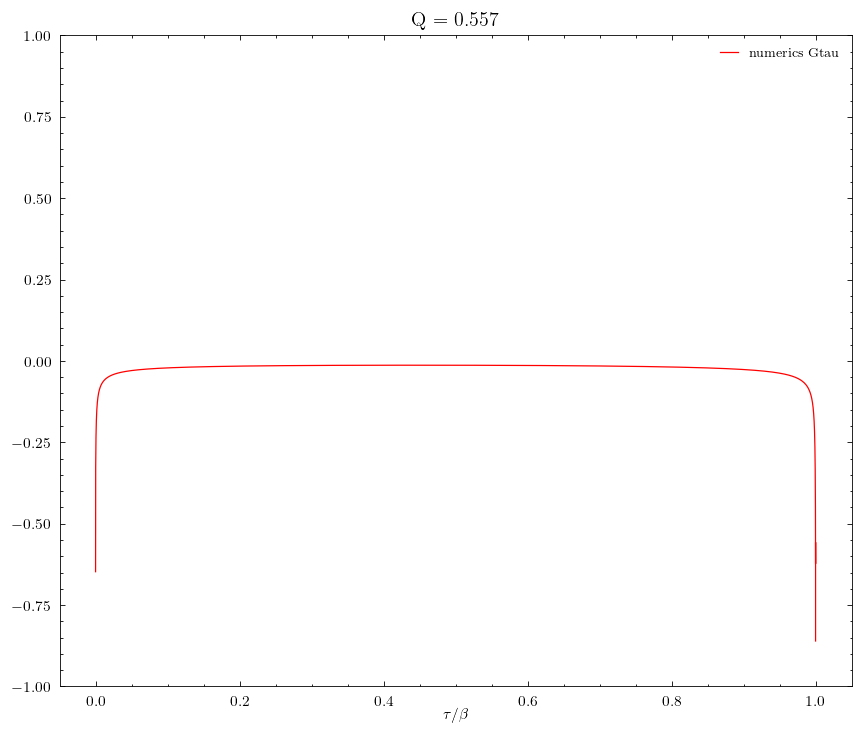

In [4]:
plt.plot(tau/beta, np.real(Gtau), 'r', label = 'numerics Gtau')
#plt.plot(tau/beta, np.real(Gconftau), 'b--', label = 'analytical Gtau' )
plt.ylim(-1,1)
plt.xlabel(r'$\tau/\beta$',labelpad = 0)
plt.legend()
plt.title('Q = %.3f ' %np.real(Q) )
Qalt = 0.5*(Gtau[0] - Gtau[-1])
print(Qalt)

0.0006283185307179586 -0.0006283185307179586
(8.498923852314785-50.42236659245886j) (8.498923842848399+50.422366592969624j)
(0.09673921578991104-0.018650218547679925j)


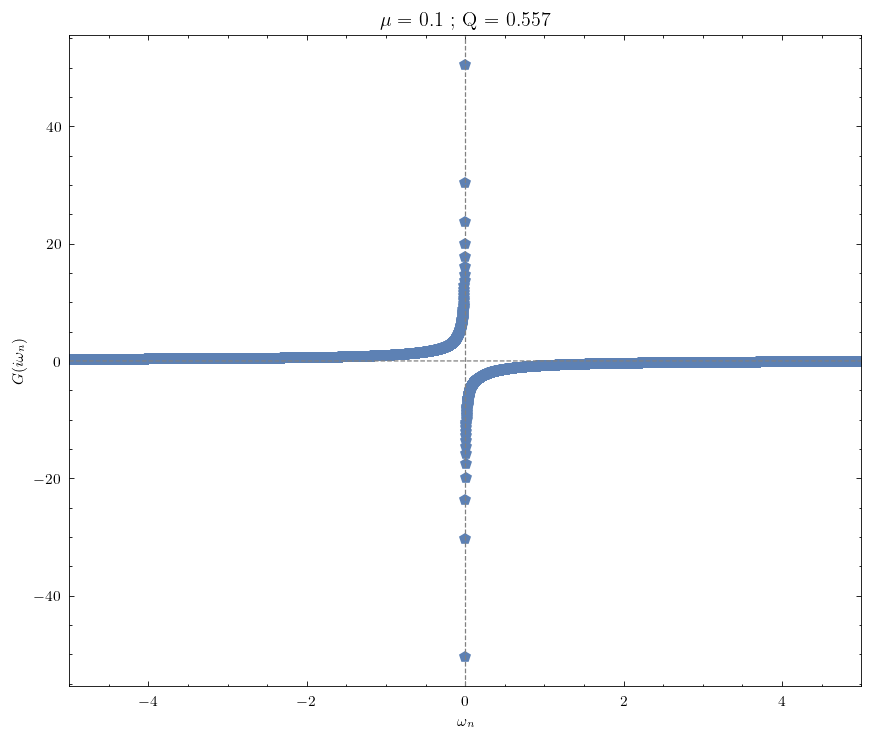

In [5]:
plt.plot(omega,np.imag(Gomega),'p')
plt.plot(omega,np.zeros_like(omega), color = 'gray', linestyle = '--')
plt.axvline(0,color='gray',linestyle = '--')
plt.xlim(-5,5)
plt.xlabel(r'$\omega_n$')
plt.ylabel(r'$G(i\omega_n)$')
plt.title(r'$\mu = $ ' + str(mu) + ' ;  Q = %.3f' %np.real(Q))
print(omega[Nbig//2], omega[Nbig//2 - 1])
print(Gomega[Nbig//2 ], Gomega[Nbig//2 - 1 ])
print(Sigmaomega[Nbig//2])

/usr/lib64/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib64/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


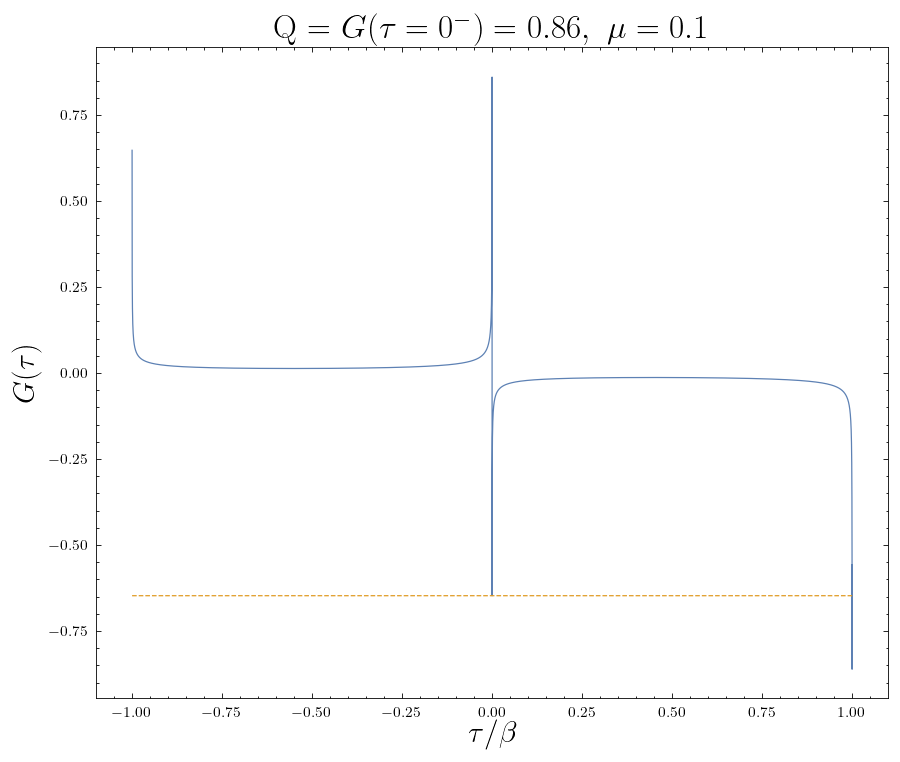

In [42]:
doubledtau = np.array([-1*tau[::-1]] + [tau]).flatten()
doubledG = np.real(np.array([-1*Gtau] + [Gtau]).flatten())
plt.plot(doubledtau/beta,doubledG)
plt.plot(doubledtau/beta, Gtau[0]*np.ones_like(doubledtau), '--', )
plt.xlabel(r'$\tau/\beta$',labelpad = 0,fontsize=18)
plt.title(f'Q = $G(\\tau = 0^-) =  {-Gtau[-1].real:.3}, \\,\\, \\mu = {mu}$',fontsize=20)
plt.ylabel(r'$G(\tau)$', fontsize=18)
plt.savefig('Gtaushowingspectasymm.pdf', bbox_inches='tight')
# plt.xlim(-0.01,0.01)

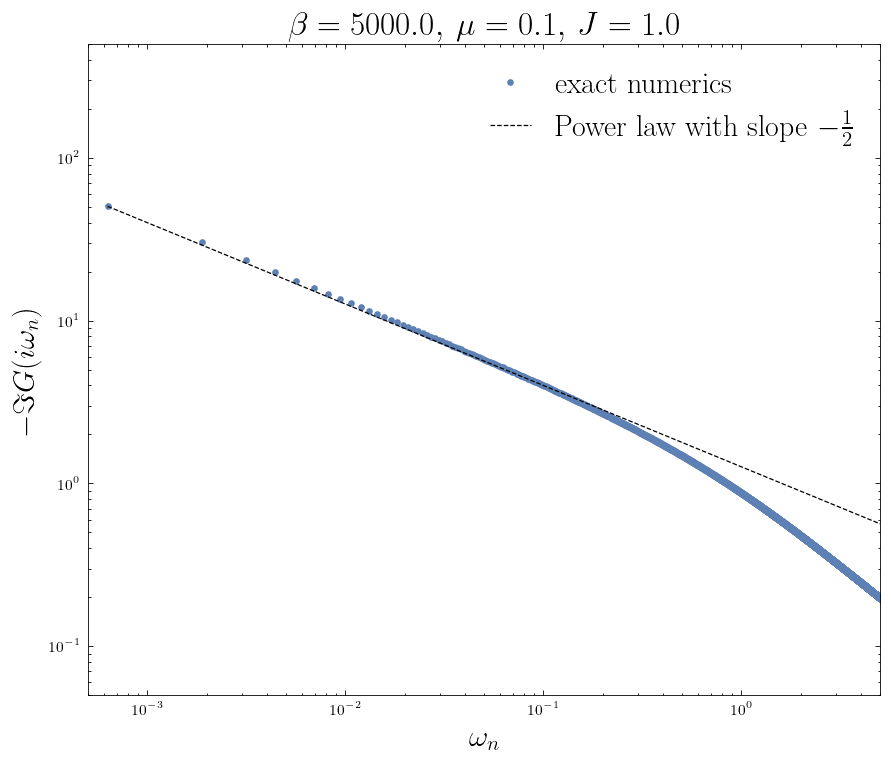

In [43]:
plt.loglog(omega[Nbig//2:],-np.imag(Gomega[Nbig//2:]),'.', label = 'exact numerics')
fudfac = -np.imag(Gomega[Nbig//2])/omega[Nbig//2]**(-0.5)
plt.loglog(omega[Nbig//2:],fudfac* (omega[Nbig//2:]**(-0.5)),'k--', label = r'Power law with slope $-\frac{1}{2}$')
# plt.title('Checking power law at low frequencies')
titlestring = f'$\\beta = {beta}, \\, \\mu = {mu}, \\, J = {J}$'
plt.title(titlestring,fontsize=20)
plt.xlabel(r'$\omega_n$',fontsize=18)
plt.ylabel(r'$-\Im{G(i\omega_n)}$',fontsize=18)
plt.xlim(5e-4,5e0)
plt.ylim(5e-2,5e2)
# plt.gca().set_aspect('equal')
# plt.figure(figsize=(8,7))
plt.legend(fontsize=18)
plt.savefig('complexSYKpowerlaw.pdf', bbox_inches='tight')

In [8]:
A = np.array([1,2,3,4,5])
np.array([-1*A[::-1]]+ [A]).flatten()

array([-5, -4, -3, -2, -1,  1,  2,  3,  4,  5])

In [9]:
tau[::-1][0], beta

(4999.997615814209, 5000.0)

In [10]:
val = 10
-tau[::-1][val],beta - tau[val]
np.real(Gtau[::-1][val]), np.real(Gtau[val])

(-0.597263274714559, -0.38910080531684155)

### Let's check if we've actually found a solution
Looks like we did 

In [11]:
print( np.sum(np.abs(Gomega - 1./(1j*omega + mu - Sigmaomega))**2))
print(np.allclose(Sigmatau , (J**2 * Gtau**2 * Gtau[::-1])))

3.2231734716908953
False


In [12]:
np.allclose(2.0,2.0001)

False

In [13]:
omega[Nbig//2]

0.0006283185307179586

Text(0.5, 1.0, '$\\mu = $ 0.1 ;  $Re{\\Sigma(\\omega \\rightarrow 0^+)}$  =  0.09673921578991104')

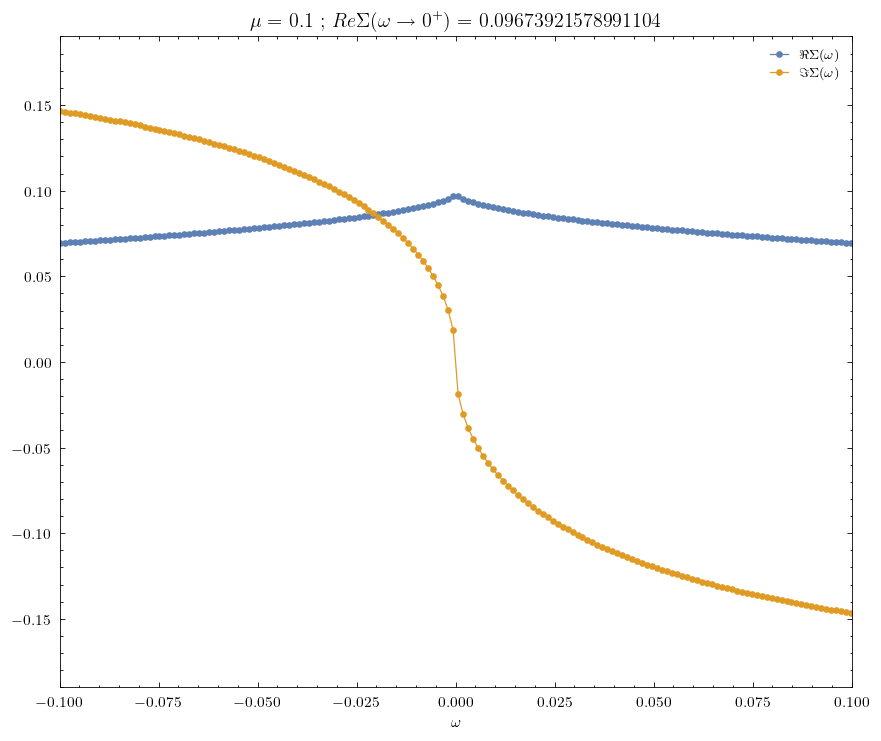

In [14]:
plt.plot(omega,np.real(Sigmaomega),'.-',label=r'$\Re{\Sigma(\omega)}$')
plt.plot(omega,np.imag(Sigmaomega),'.-',label=r'$\Im{\Sigma(\omega)}$')
plt.xlim(-0.1,0.1)
plt.xlabel(r'$\omega$')
plt.legend()
plt.title(r'$\mu = $ ' + str(mu) + r' ;  $Re{\Sigma(\omega \rightarrow 0^+)}$  =  ' + str(np.real(Sigmaomega[Nbig//2])))

(-0.3, 0.3)

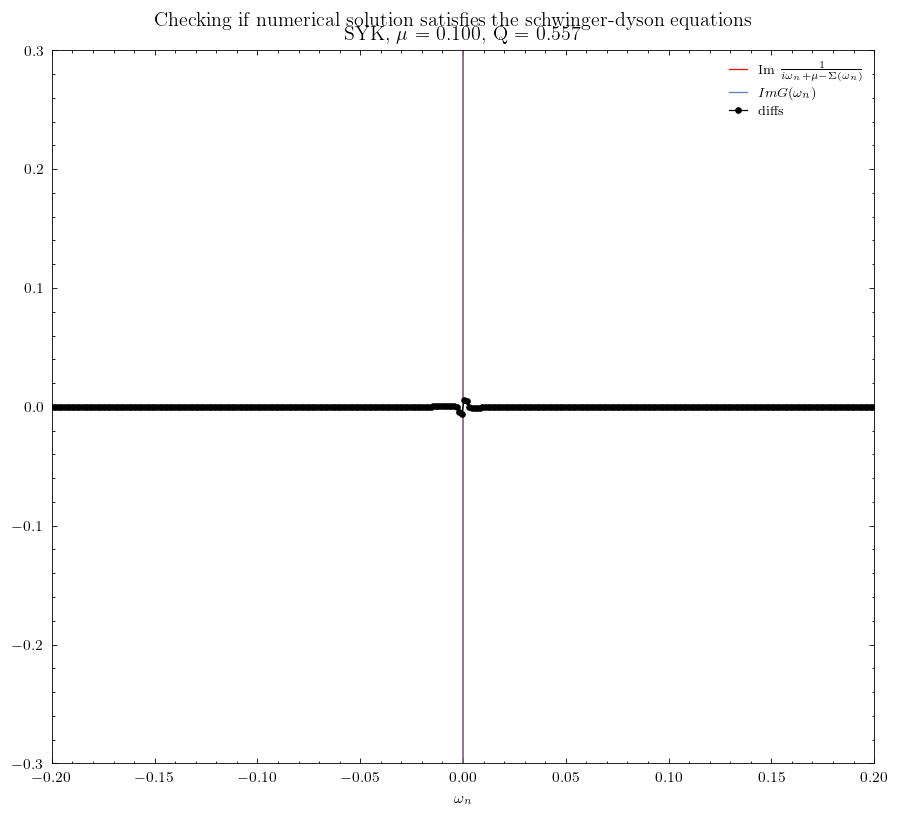

In [15]:
fig, ax1 = plt.subplots(1)
fig.tight_layout(pad=3)
fig.suptitle('Checking if numerical solution satisfies the schwinger-dyson equations')

ax1.plot(omega,np.imag(1./(1j*omega + mu  - Sigmaomega)),'r',label=r'Im $\frac{1}{i\omega_n + \mu - \Sigma(\omega_n)}$') 
ax1.plot(omega,np.imag(Gomega),label=r'$Im G(\omega_n)$')
ax1.plot(omega,np.imag(Gomega - 1./(1j*omega + mu  - Sigmaomega)),'k.-',label='diffs')
ax1.set_title('SYK, $\\mu$ = %.3f,  Q = %.3f' %(mu,np.real(Q)))
ax1.legend()
ax1.set_xlabel(r'$\omega_n$')
ax1.set_xlim(-0.2,0.2)
ax1.set_ylim(-0.3,0.3)

0.4999995231628418
[0.75263808+1.03438542e-10j 0.61897548+4.34367266e-10j
 0.6599421 -2.66380424e-10j 0.64350117-8.55386639e-12j
 0.65318983+2.55437135e-10j]


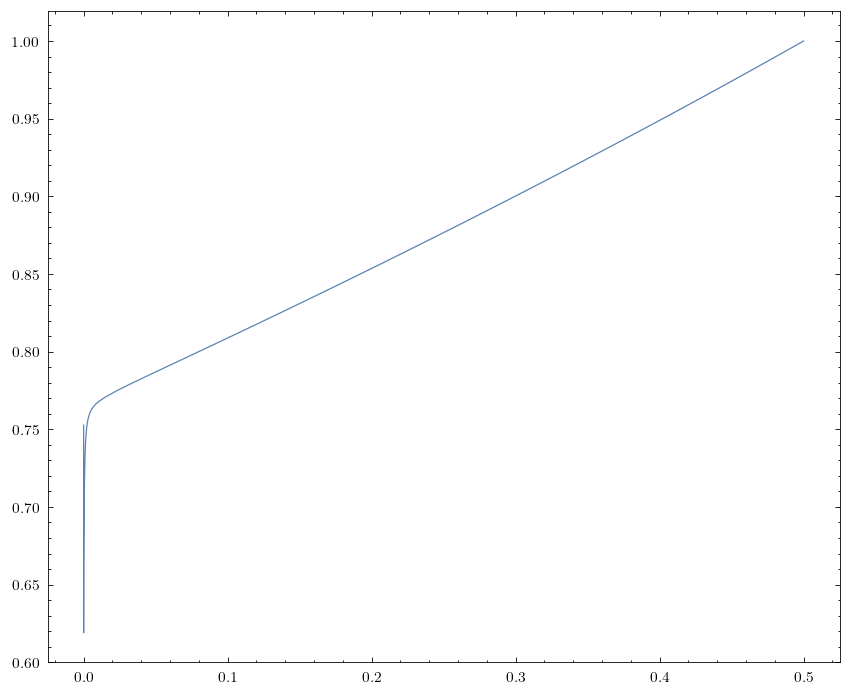

In [16]:
print(tau[Nbig//2 - 1]/beta)
twopie = Gtau[:Nbig//2 - 1] / Gtau[-1:Nbig//2:-1]
plt.plot(tau[:Nbig//2 -1 ]/beta, twopie)
print(twopie[0:5])